In [28]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [29]:
#df = pd.read_parquet('data/mta_subway_220108_39wk_dbscan.parquet')
#df = pd.read_parquet('data/mta_subway_210109_90wk.parquet')
df = pd.read_parquet('data/mta_subway_210109_90wk_dbscan.parquet')

In [30]:
def plot_ents(station, df):
    df[f'{station}_ent'].plot(figsize=(20,10))
    df[f'{station}_ex'].plot(figsize=(20,10))
    #plt.ylim(0,2000)
    plt.show()

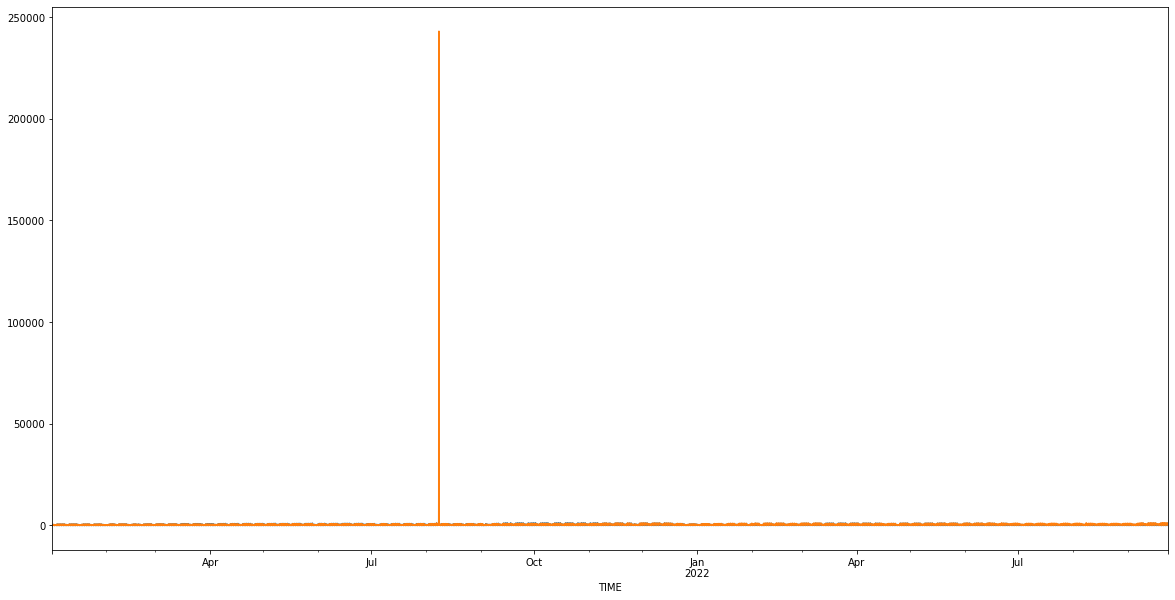

In [31]:
plot_ents('103 ST',df)

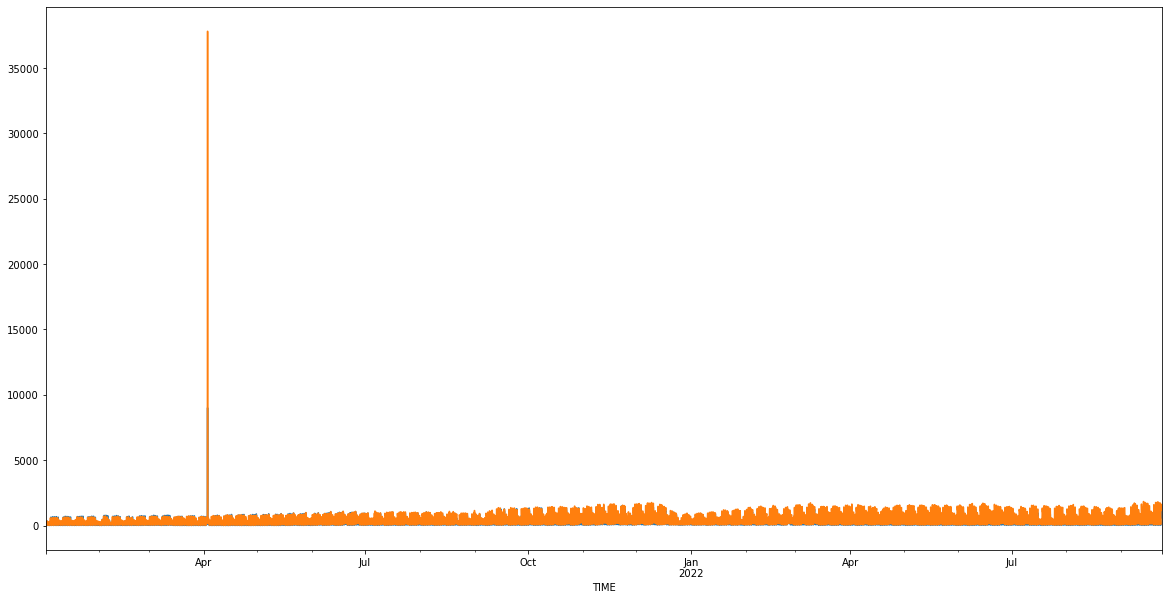

In [32]:
plot_ents('7 AV',df)

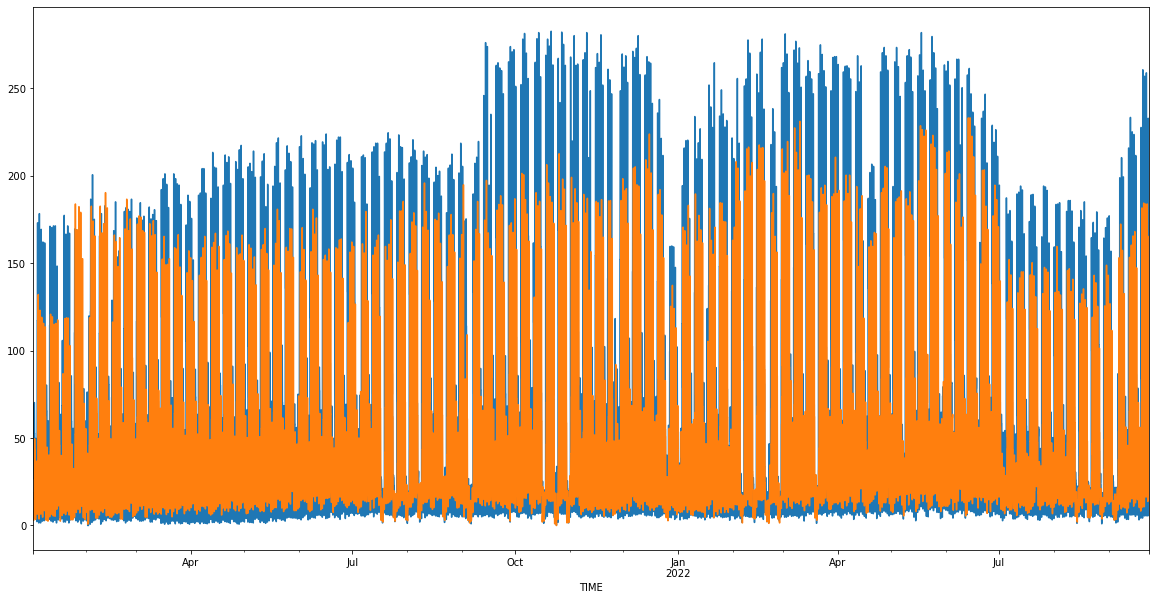

In [33]:
plot_ents('104 ST',df)

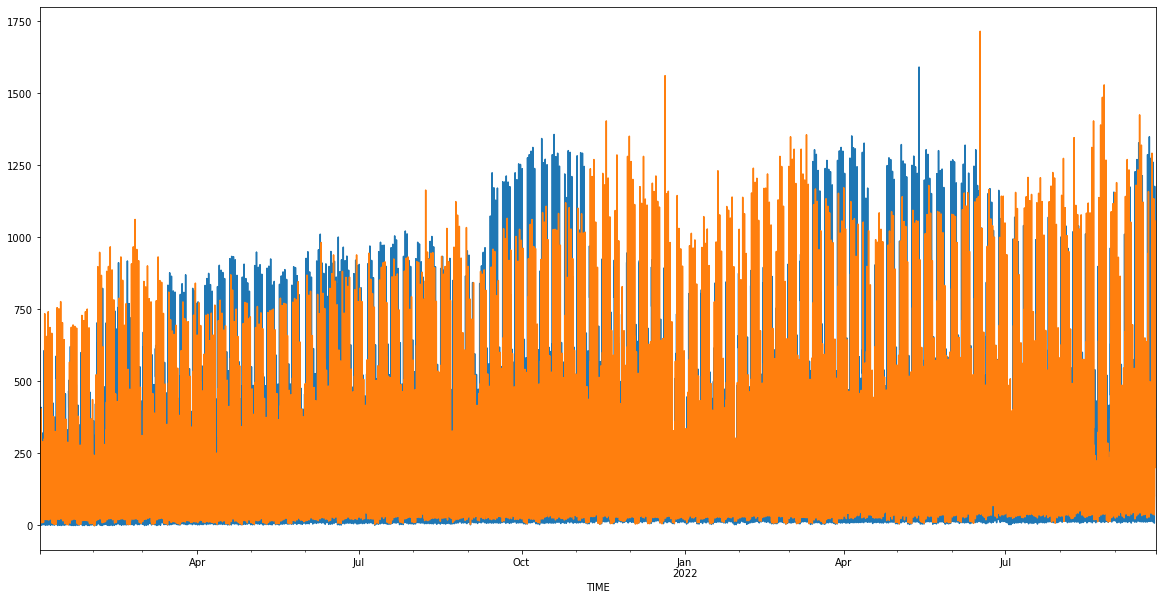

In [34]:
plot_ents('18 AV',df)

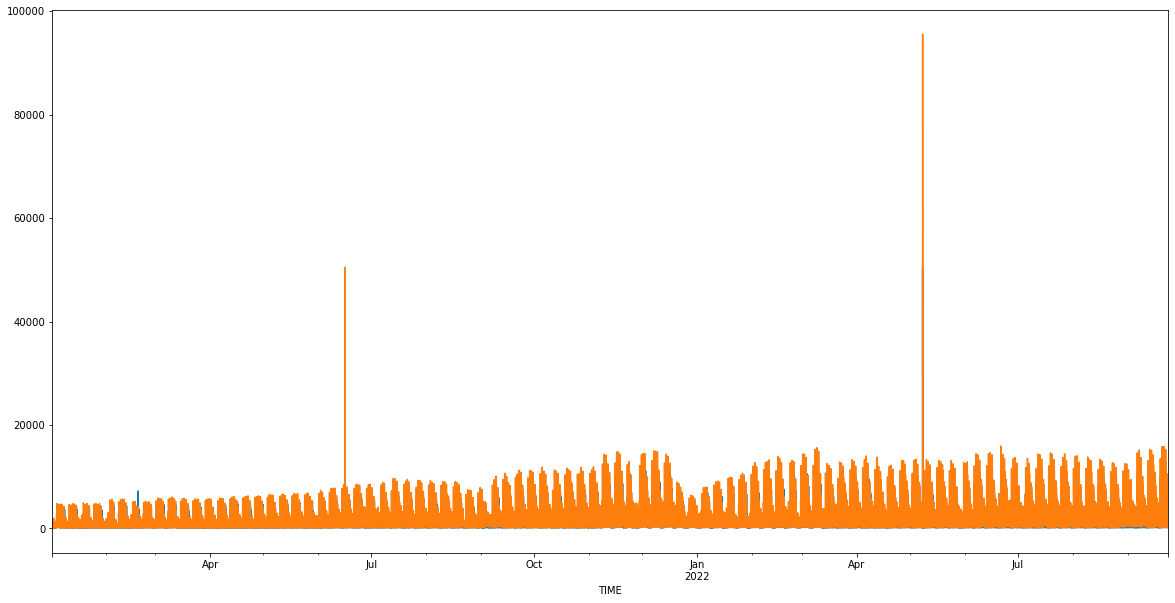

In [35]:
plot_ents('GRD CNTRL-42 ST',df)

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

def anomaly_replacement(df):
    #df_out = pd.DataFrame()
    df_out = df.copy()
    for x in df.columns:
        df[[x]] = df[[x]].fillna(method='bfill').fillna(method='ffill')
        _df = df[[x]]
        
        dbscan = DBSCAN(eps=2200, min_samples=8)
        dbscan.fit(_df)
        outliers = np.argwhere(dbscan.labels_ == -1).flatten()
        _df.iloc[outliers,:] = np.nan
        _df = _df.fillna(method='bfill').fillna(method='ffill')
        df_out[x] = _df
    return df_out

In [ ]:
df1 = anomaly_replacement(df)

In [ ]:
plot_ents('7 AV', df1)

In [ ]:
plot_ents('7 AV', df)

In [ ]:
plot_ents('104 ST',df1)

In [ ]:
plot_ents('104 ST',df)

In [ ]:
df['7 AV_ent'].median()

In [ ]:
df1['7 AV_ent'].plot()

In [ ]:
2000/df['7 AV_ent'].median()

In [ ]:
df['7 AV_ent'].quantile(0.99)*2

In [ ]:
df['GRD CNTRL-42 ST_ent'].quantile(0.99)*2

In [ ]:
df1['7 AV_ent'].median()

In [ ]:
df['7 AV_ent'].max()

In [ ]:
df1['7 AV_ent'].max()

In [ ]:
#df['GRD CNTRL-42 ST_ent'].plot()
df1['GRD CNTRL-42 ST_ent'].plot(figsize=(20,10))

In [ ]:
int(24*7/4/4)

In [ ]:
df['7 AV_ent'].plot()
df1['7 AV_ent'].plot()

In [ ]:
abs(-2)

In [ ]:
(2022-2016)*52

In [ ]:
(7*24)*312

In [ ]:
90*7*24

<AxesSubplot:xlabel='TIME'>

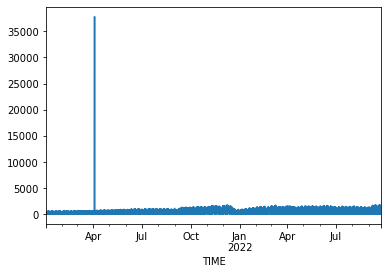

In [21]:
df['7 AV_ex'].plot()

In [23]:
df['7 AV_ex'].quantile(.999)

1782.2510000000257

In [27]:
df['7 AV_ex'][df['7 AV_ex'] > df['7 AV_ex'].quantile(.9996)]

TIME
2021-04-03 02:00:00    37807.75
2021-04-03 03:00:00    37807.75
2021-04-03 04:00:00    37807.75
2021-04-03 05:00:00    37807.75
Name: 7 AV_ex, dtype: float64